In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

C:\anaconda\envs\test3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\anaconda\envs\test3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\anaconda\envs\test3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\anaconda\envs\test3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type

In [2]:
import keras.datasets as d
help(d)

Help on package keras.datasets in keras:

NAME
    keras.datasets

PACKAGE CONTENTS
    boston_housing
    cifar
    cifar10
    cifar100
    fashion_mnist
    imdb
    mnist
    reuters

DATA
    absolute_import = _Feature((2, 5, 0, 'alpha', 1), (3, 0, 0, 'alpha', 0...

FILE
    c:\anaconda\envs\test3\lib\site-packages\keras\datasets\__init__.py




In [3]:
fmnist = keras.datasets.fashion_mnist
fmnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [4]:
(X_train, y_train), (X_test, y_test) = fmnist.load_data()

In [8]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

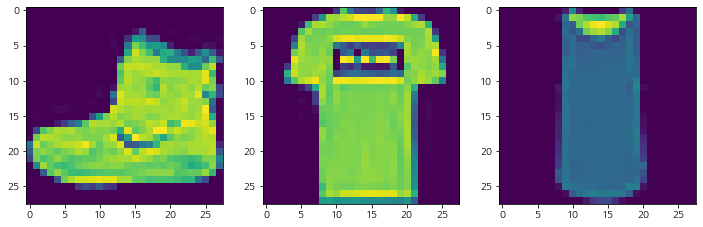

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(X_train[0])

plt.subplot(1, 3, 2)
plt.imshow(X_train[1])

plt.subplot(1, 3, 3)
plt.imshow(X_train[2])

In [9]:
import numpy as np
X_train2 = X_train[:, :, :, np.newaxis]
X_test2 = X_test[:, :, :, np.newaxis]

In [10]:
X_train2.shape

(60000, 28, 28, 1)

In [17]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='Same',
                 strides=(1,1), input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', strides=(1,1))
model.add(MaxPooling2D(pool_size=(2, 2)))
          
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='Same', strides=(1,1))
model.add(MaxPooling2D(pool_size=(2, 2)))
          
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [19]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)             

In [29]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [30]:
#y_train2 = to_categorical(y_train.astype(np.int), 10)
y_train2 = to_categorical(y_train, 10)

C:\anaconda\envs\test3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [32]:
model.fit(X_train2, y_train2,
          epochs=10,
          batch_size=100,
          verbose=2)


Epoch 1/10
 - 156s - loss: 0.4991 - accuracy: 0.8400
Epoch 2/10
 - 158s - loss: 0.2884 - accuracy: 0.8962
Epoch 3/10
 - 169s - loss: 0.2467 - accuracy: 0.9104
Epoch 4/10
 - 183s - loss: 0.2192 - accuracy: 0.9181
Epoch 5/10
 - 164s - loss: 0.1971 - accuracy: 0.9278
Epoch 6/10
 - 169s - loss: 0.1773 - accuracy: 0.9341
Epoch 7/10
 - 175s - loss: 0.1624 - accuracy: 0.9394
Epoch 8/10
 - 166s - loss: 0.1480 - accuracy: 0.9444
Epoch 9/10
 - 178s - loss: 0.1378 - accuracy: 0.9474
Epoch 10/10
 - 186s - loss: 0.1265 - accuracy: 0.9530


In [33]:
y_test2 = to_categorical(y_test.astype(np.int), 10)
#y_test2 = to_categorical(y_test, 10)

C:\anaconda\envs\test3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


In [34]:
loss, acc = model.evaluate(X_test2, y_test2)

10000/10000 [==============================] - 7s 727us/step


In [35]:
print('손실값:', round(loss, 3))
print('정확도:', round(acc, 3))

손실값: 0.287
정확도: 0.912


In [36]:
y_pred = model.predict(X_test2)
print(y_pred[0:3])

[[1.4290947e-12 5.5842839e-12 1.0142185e-13 8.2392377e-13 7.4927602e-09
  8.3777859e-06 2.7366685e-12 1.1562600e-05 6.0458122e-10 9.9998009e-01]
 [2.3282060e-05 1.3419972e-17 9.9997437e-01 9.5295525e-07 1.3965745e-06
  1.3991616e-16 1.3176542e-08 2.4645848e-17 4.3748371e-15 5.3866405e-17]
 [8.2119802e-16 1.0000000e+00 9.5115754e-16 3.9446481e-16 3.8634387e-17
  2.4602430e-24 5.0527115e-14 6.1781146e-25 8.0981147e-18 3.1410412e-22]]


In [37]:
y_pred_class = model.predict_classes(X_test2)
print(y_pred_class[0:3])

[9 2 1]


In [ ]:
# -------------------------------------------------------------

## 케라스로 RNN 학습 수행
### 1. 데이터 준비

In [38]:
import numpy as np
s = np.sin(2 * np.pi * 0.125 * np.linspace(0, 20, 100))

X, y = [], []

for i in range(3, len(s)):
    X.append(np.array([s[i-j] for j in range(3, 0, -1)])) # list comprehension 중요!
    y.append(s[i])

X = np.array(X).reshape(len(X), 3, 1)
y = np.array(y).reshape(len(y), 1)

### 2. 인공 신경망 모형 구성

In [39]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

model = Sequential()
model.add(SimpleRNN(units=10, input_shape=(3,1)))
model.add(Dense(units=1, activation='tanh'))

### 3. 모형 학습 과정 설정

In [42]:
model.compile(loss='mean_squared_error', #연속형 숫자
              optimizer='sgd', 
              #metrics=['accuracy'] #분류 아니므로
              #metrics=['mse']
             )

In [44]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


### 4. 모형 학습

In [43]:
model.fit(X, y, epochs=10, batch_size=10, verbose=2)

Epoch 1/10
 - 0s - loss: 0.1181
Epoch 2/10
 - 0s - loss: 0.1147
Epoch 3/10
 - 0s - loss: 0.1107
Epoch 4/10
 - 0s - loss: 0.1071
Epoch 5/10
 - 0s - loss: 0.1038
Epoch 6/10
 - 0s - loss: 0.1001
Epoch 7/10
 - 0s - loss: 0.0968
Epoch 8/10
 - 0s - loss: 0.0937
Epoch 9/10
 - 0s - loss: 0.0904
Epoch 10/10
 - 0s - loss: 0.0874


### 5. 모형 출력 확인

C:\anaconda\envs\test3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\anaconda\envs\test3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


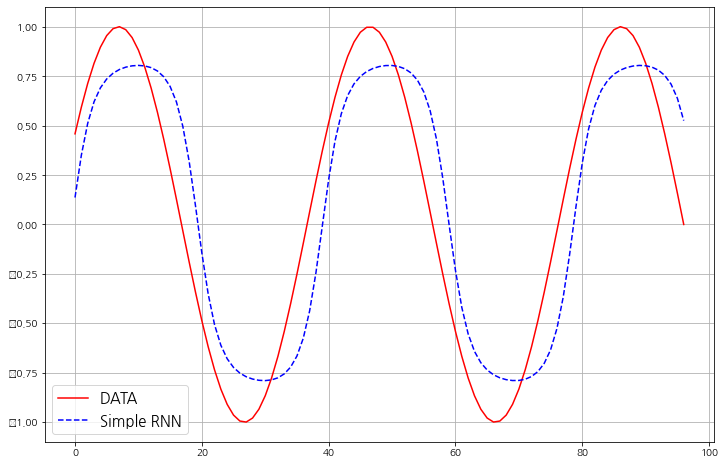

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(s[3:], color='red', label='DATA')
plt.plot(model.predict(X), color='blue', linestyle='--', label='Simple RNN')
plt.grid()
plt.legend(fontsize=15)